In [3]:
import pandas as pd
data = pd.read_csv("Insurance claims data.csv")
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
import pandas as pd
data = pd.read_csv("Insurance claims data.csv")
data.head()

data.info()
data.isnull().sum()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#plotting the distribution of target variable i.e claim_status
plt.figure(figsize=(8,5))
sns.countplot(x='claim_status', data = data)
plt.title("Distribution of Claim Status")
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show() #the distribution shows a significant imbalance between the classes

numerical_columns = ['subscription_length','vehicle_age','customer_age']

#plotting the distribution of numerical features
plt.figure(figsize =(15,5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True) # adding kde curve which is kernal density estimates 
    plt.title(f"Distribution of {column}")
    
plt.tight_layout()
plt.show()

categorical_columns = ["region_code","segment","fuel_type"]

#plotting the distribution of categorical features
plt.figure(figsize =(15,5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)    
    plt.title(f"Distribution of {column}")
    
plt.tight_layout()
plt.show()

from sklearn.utils import resample

majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

#oversample the minority class
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
oversampled_data = pd.concat([majority, minority_oversampled])

#check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

plt.figure(figsize=(15,5))

#customer_age Distribution
plt.subplot(1,3,1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title("Customer Age Distribution")

#vehicle age distri
plt.subplot(1,3,2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title("Vehicle Age Distribution")

#subscription_length distribution
plt.subplot(1,3,3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#encode categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype=='object' else col)

x = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

#random forest classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x,y)

#getting feature importance
feature_importance = rf_model.feature_importances_

#create dataframe for visualizing feature importance
features_df = pd.DataFrame({'Features': x.columns, 'Importance':feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

oversampled_data = oversampled_data.drop('policy_id', axis=1, errors='ignore')

#prepare the oversampled data
x_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

x_oversampled_encoded = x_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype=='object' else col)

#splitting the datasets into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

#create and train the random forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(x_train, y_train)

#predictions
y_pred = rf_model_oversampled.predict(x_test)

print(classification_report(y_test, y_pred))



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [5]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

# EDA

# Distribution Of Target Varible(claim_status)

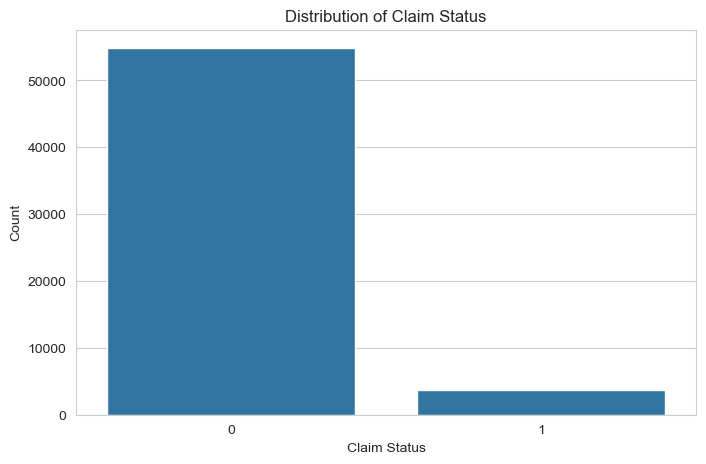

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#plotting the distribution of target variable i.e claim_status
plt.figure(figsize=(8,5))
sns.countplot(x='claim_status', data = data)
plt.title("Distribution of Claim Status")
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show() #the distribution shows a significant imbalance between the classes

# Distribution of Numerical Features

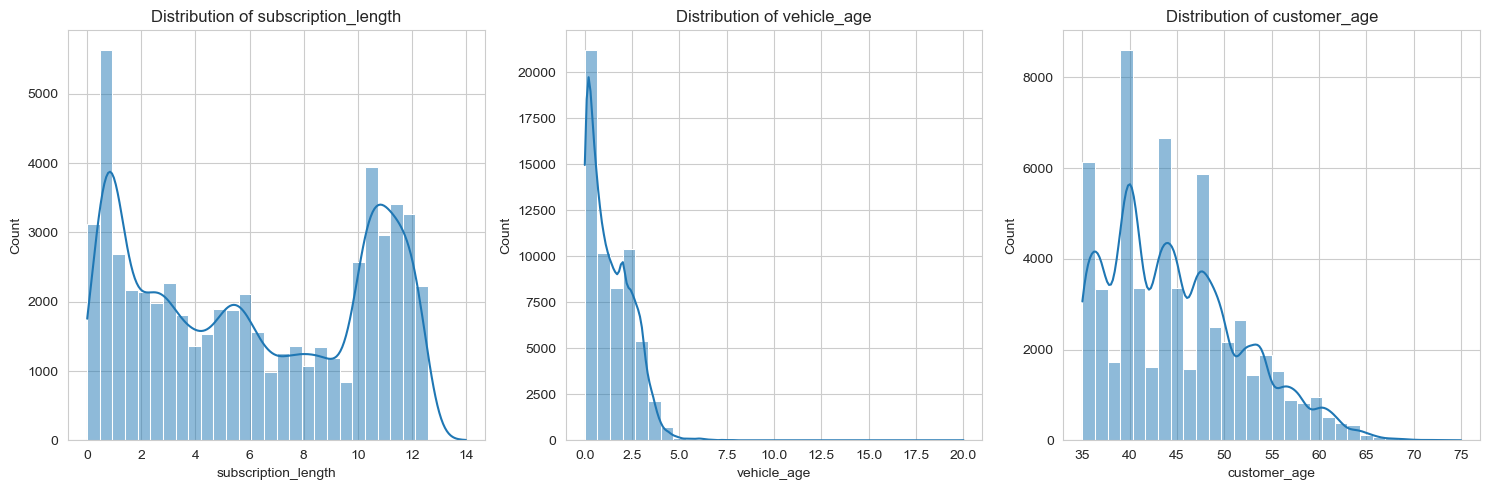

In [7]:
numerical_columns = ['subscription_length','vehicle_age','customer_age']

#plotting the distribution of numerical features
plt.figure(figsize =(15,5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True) # adding kde curve which is kernal density estimates 
    plt.title(f"Distribution of {column}")
    
plt.tight_layout()
plt.show()


# Distribution of Categorical Features

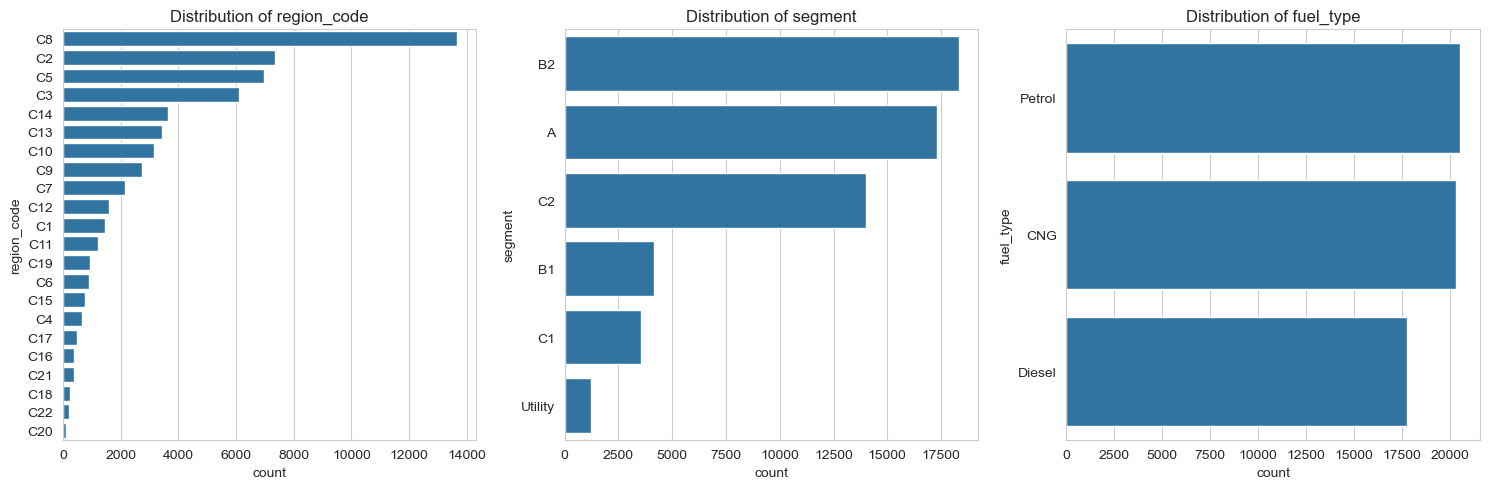

In [10]:
categorical_columns = ["region_code","segment","fuel_type"]

#plotting the distribution of categorical features
plt.figure(figsize =(15,5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)    
    plt.title(f"Distribution of {column}")
    
plt.tight_layout()
plt.show()


# HANDLING CLASS IMBALANCE

In [13]:
from sklearn.utils import resample

majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

#oversample the minority class
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
oversampled_data = pd.concat([majority, minority_oversampled])

#check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution


claim_status
0    54844
1    54844
Name: count, dtype: int64

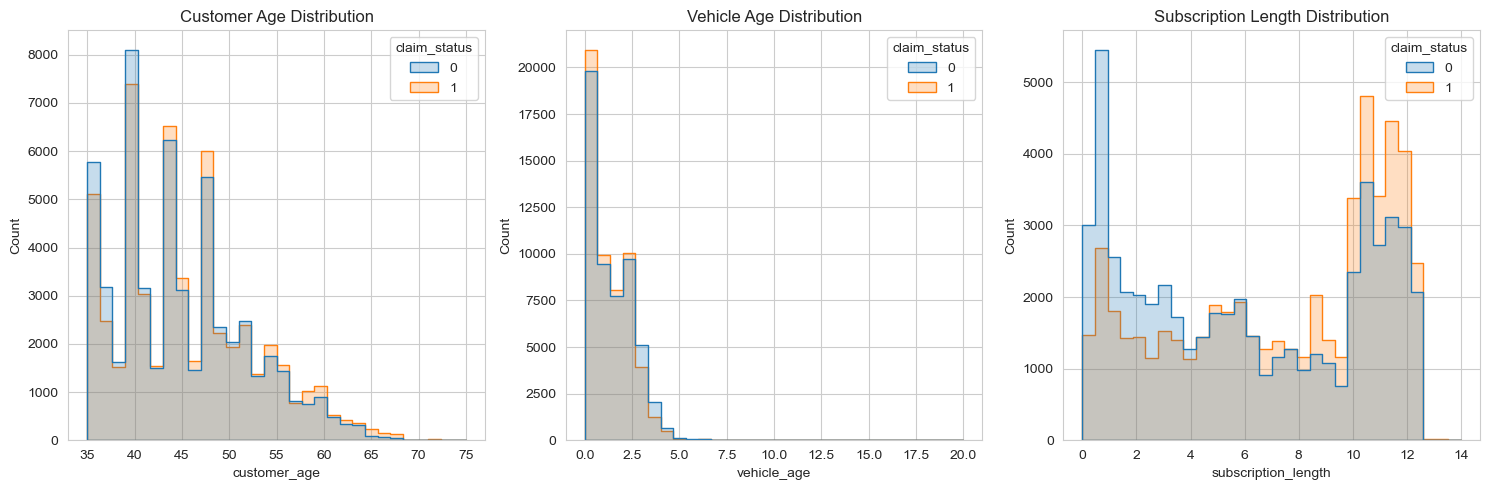

In [15]:
plt.figure(figsize=(15,5))

#customer_age Distribution
plt.subplot(1,3,1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title("Customer Age Distribution")

#vehicle age distri
plt.subplot(1,3,2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title("Vehicle Age Distribution")

#subscription_length distribution
plt.subplot(1,3,3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()


In [ ]:
#here the original data does look like the original data

# FEATURE SELECTION

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#encode categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype=='object' else col)

x = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

#random forest classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x,y)

#getting feature importance
feature_importance = rf_model.feature_importances_

#create dataframe for visualizing feature importance
features_df = pd.DataFrame({'Features': x.columns, 'Importance':feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))


               Features  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


# MODEL TRAINING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

oversampled_data = oversampled_data.drop('policy_id', axis=1, errors='ignore')

#prepare the oversampled data
x_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

x_oversampled_encoded = x_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype=='object' else col)

#splitting the datasets into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

#create and train the random forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(x_train, y_train)

#predictions
y_pred = rf_model_oversampled.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



# Packaging Model With Python

In [30]:
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model_oversampled, f)


In [32]:
# Function to load the saved model
def load_model():
    with open('rf_model.pkl', 'rb') as f:
        model = pickle.load(f)
    return model

#function to make predictions
def predict(input_data):
    model = load_model()
    prediction = model.predict(input_data)
    return prediction
